#  Data Modeling

## Loading Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_feather('data/model_data.feather')
df

,order_purchase_timestamp,review_score,freight_value,payment_type,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,carrier_status,arrival_status,review_answering,approved_speed,delivery_speed,arrival_speed,shipping_speed,category_label,product_volume_cmcube,payment_label
0,2017-10-02 10:56:33,4,8.72,credit_card,1,18.12,40.0,268.0,4.0,500.0,...,Early,Early,Very Fast,Very Fast,Very Fast,Fast,Fast,Home & Décor,1976.0,0-50
1,2017-10-02 10:56:33,4,8.72,voucher,1,2.00,40.0,268.0,4.0,500.0,...,Early,Early,Very Fast,Very Fast,Very Fast,Fast,Fast,Home & Décor,1976.0,0-50
2,2017-10-02 10:56:33,4,8.72,voucher,1,18.59,40.0,268.0,4.0,500.0,...,Early,Early,Very Fast,Very Fast,Very Fast,Fast,Fast,Home & Décor,1976.0,0-50
3,2017-08-15 18:29:31,4,7.78,credit_card,3,37.77,40.0,268.0,4.0,500.0,...,Early,Early,Slow,Slow,Very Fast,Very Fast,Very Fast,Home & Décor,1976.0,0-50
4,2017-08-02 18:24:47,5,7.78,credit_card,1,37.77,40.0,268.0,4.0,500.0,...,Early,Early,Very Slow,Fast,Very Fast,Very Fast,Very Fast,Home & Décor,1976.0,0-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113188,2017-08-12 19:20:39,5,39.06,credit_card,5,213.06,57.0,232.0,1.0,7600.0,...,Early,Early,Very Slow,Very Fast,Fast,Very Fast,Very Fast,Food & Beverage,45375.0,200-500
113189,2017-07-31 18:10:29,5,26.18,credit_card,2,55.18,57.0,429.0,1.0,2700.0,...,Early,Early,Slow,Fast,Slow,Fast,Fast,Food & Beverage,23800.0,50-100
113190,2017-07-31 18:10:29,5,26.18,voucher,1,100.00,57.0,429.0,1.0,2700.0,...,Early,Early,Slow,Fast,Slow,Fast,Fast,Food & Beverage,23800.0,50-100
113191,2017-07-11 10:45:57,5,27.16,credit_card,1,47.15,33.0,532.0,1.0,3600.0,...,Early,Early,Fast,Very Fast,Fast,Fast,Fast,Food & Beverage,27000.0,0-50


In [3]:
df.columns

Index(['order_purchase_timestamp', 'review_score', 'freight_value',
       'payment_type', 'payment_installments', 'payment_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'approved_hours',
       'estimated_days', 'arrival_days', 'shipping_days', 'carrier_status',
       'arrival_status', 'review_answering', 'approved_speed',
       'delivery_speed', 'arrival_speed', 'shipping_speed', 'category_label',
       'product_volume_cmcube', 'payment_label'],
      dtype='object')

## Data Preprocessing

<Axes: >

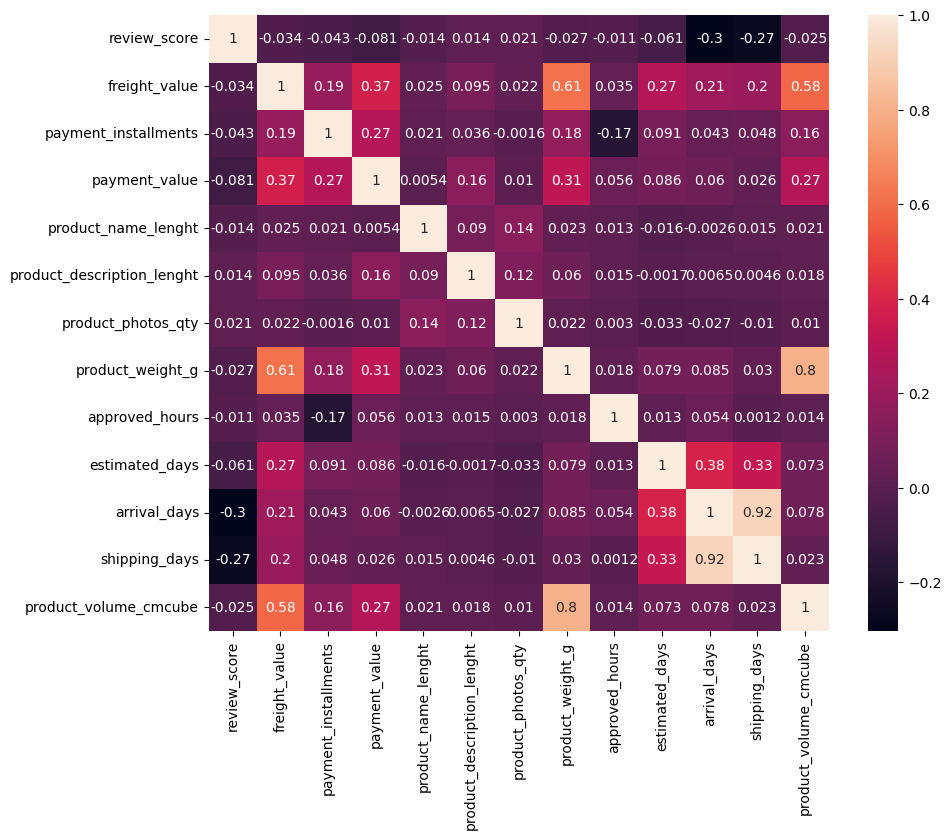

In [4]:
# Check all the correlations between features
plt.figure(figsize= [10, 8])
sns.heatmap(df.select_dtypes(include='number').corr(), annot= True)

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, adjusted_rand_score, silhouette_score, r2_score, confusion_matrix
from imblearn.over_sampling import SMOTE

## 1. Review Score Forcasting

In [6]:
# Feature Engineering
score_labels = { 1 : 'Unsatisfied', 2 : 'Unsatisfied',  3 : 'Unsatisfied', 4 : 'Satisfied', 5 : 'Satisfied'}
df['review_score_label'] = df['review_score'].map(score_labels)
df

,order_purchase_timestamp,review_score,freight_value,payment_type,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,arrival_status,review_answering,approved_speed,delivery_speed,arrival_speed,shipping_speed,category_label,product_volume_cmcube,payment_label,review_score_label
0,2017-10-02 10:56:33,4,8.72,credit_card,1,18.12,40.0,268.0,4.0,500.0,...,Early,Very Fast,Very Fast,Very Fast,Fast,Fast,Home & Décor,1976.0,0-50,Satisfied
1,2017-10-02 10:56:33,4,8.72,voucher,1,2.00,40.0,268.0,4.0,500.0,...,Early,Very Fast,Very Fast,Very Fast,Fast,Fast,Home & Décor,1976.0,0-50,Satisfied
2,2017-10-02 10:56:33,4,8.72,voucher,1,18.59,40.0,268.0,4.0,500.0,...,Early,Very Fast,Very Fast,Very Fast,Fast,Fast,Home & Décor,1976.0,0-50,Satisfied
3,2017-08-15 18:29:31,4,7.78,credit_card,3,37.77,40.0,268.0,4.0,500.0,...,Early,Slow,Slow,Very Fast,Very Fast,Very Fast,Home & Décor,1976.0,0-50,Satisfied
4,2017-08-02 18:24:47,5,7.78,credit_card,1,37.77,40.0,268.0,4.0,500.0,...,Early,Very Slow,Fast,Very Fast,Very Fast,Very Fast,Home & Décor,1976.0,0-50,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113188,2017-08-12 19:20:39,5,39.06,credit_card,5,213.06,57.0,232.0,1.0,7600.0,...,Early,Very Slow,Very Fast,Fast,Very Fast,Very Fast,Food & Beverage,45375.0,200-500,Satisfied
113189,2017-07-31 18:10:29,5,26.18,credit_card,2,55.18,57.0,429.0,1.0,2700.0,...,Early,Slow,Fast,Slow,Fast,Fast,Food & Beverage,23800.0,50-100,Satisfied
113190,2017-07-31 18:10:29,5,26.18,voucher,1,100.00,57.0,429.0,1.0,2700.0,...,Early,Slow,Fast,Slow,Fast,Fast,Food & Beverage,23800.0,50-100,Satisfied
113191,2017-07-11 10:45:57,5,27.16,credit_card,1,47.15,33.0,532.0,1.0,3600.0,...,Early,Fast,Very Fast,Fast,Fast,Fast,Food & Beverage,27000.0,0-50,Satisfied


In [7]:
# Drop all the useless columns
X1 = df.drop(['order_purchase_timestamp', 'review_score', 'review_score_label','approved_hours',
              'estimated_days', 'arrival_days', 'shipping_days'], axis=1)
Y1 = df['review_score_label']

In [8]:
# One-Hot Encoding
X1 = pd.get_dummies(X1, drop_first=True)
X1

,freight_value,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cmcube,payment_type_credit_card,payment_type_debit_card,...,category_label_Home & Décor,category_label_Office & School Supplies,category_label_Others,category_label_Sports & Outdoor,category_label_Toys & Games,payment_label_50-100,payment_label_100-200,payment_label_200-500,payment_label_500-1k,payment_label_>1k
0,8.72,1,18.12,40.0,268.0,4.0,500.0,1976.0,True,False,...,True,False,False,False,False,False,False,False,False,False
1,8.72,1,2.00,40.0,268.0,4.0,500.0,1976.0,False,False,...,True,False,False,False,False,False,False,False,False,False
2,8.72,1,18.59,40.0,268.0,4.0,500.0,1976.0,False,False,...,True,False,False,False,False,False,False,False,False,False
3,7.78,3,37.77,40.0,268.0,4.0,500.0,1976.0,True,False,...,True,False,False,False,False,False,False,False,False,False
4,7.78,1,37.77,40.0,268.0,4.0,500.0,1976.0,True,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113188,39.06,5,213.06,57.0,232.0,1.0,7600.0,45375.0,True,False,...,False,False,False,False,False,False,False,True,False,False
113189,26.18,2,55.18,57.0,429.0,1.0,2700.0,23800.0,True,False,...,False,False,False,False,False,True,False,False,False,False
113190,26.18,1,100.00,57.0,429.0,1.0,2700.0,23800.0,False,False,...,False,False,False,False,False,True,False,False,False,False
113191,27.16,1,47.15,33.0,532.0,1.0,3600.0,27000.0,True,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
# Split train set and test set
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state= 42)

<Axes: >

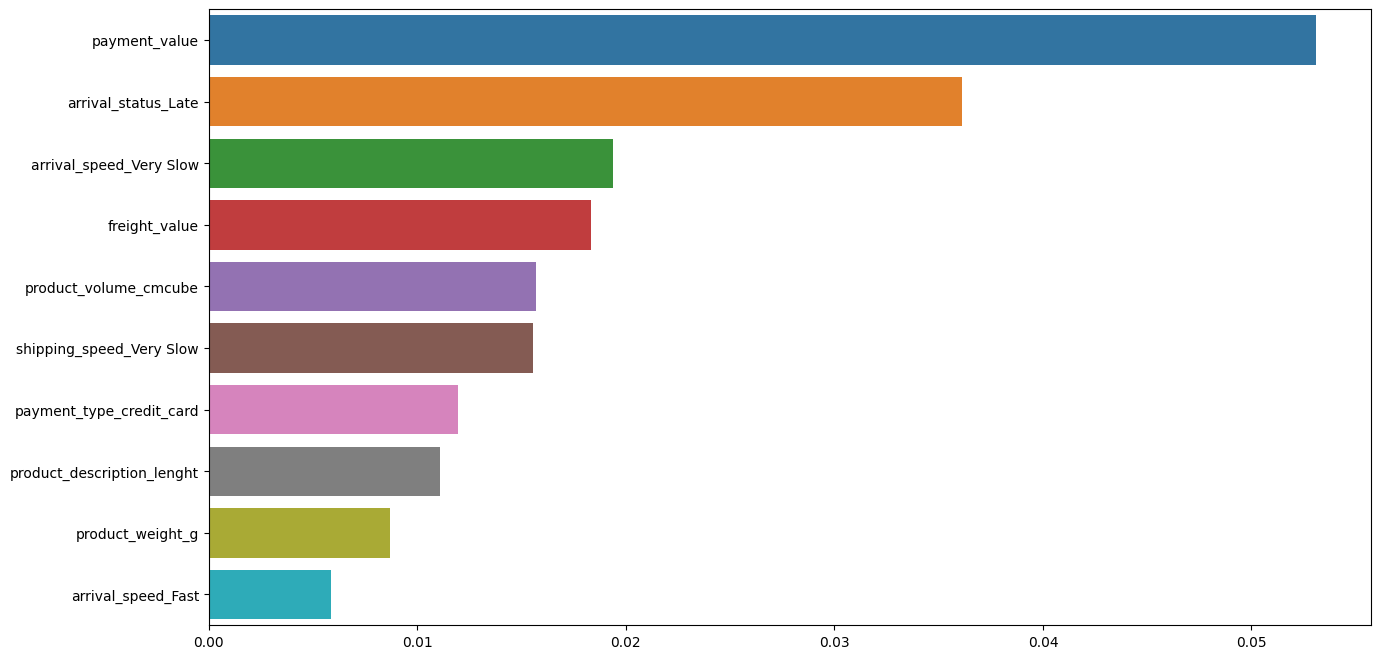

In [10]:
# Visualize the best 10 features
fs1 = SelectKBest(mutual_info_classif, k= 'all')
fs1.fit(x_train1, y_train1)
x_train_fs1 = fs1.transform(x_train1)
x_test_fs1 = fs1.transform(x_test1)

plt.figure(figsize=[15, 8])
fs1_scores_reversed = np.argsort(fs1.scores_)[::-1]

# Get the top 10 features
features1 = []
for i in range(10):
    features1.append(fs1.feature_names_in_[fs1_scores_reversed[i]])

sns.barplot(x = fs1.scores_[fs1_scores_reversed[range(10)]], y = features1)

In [11]:
# Select the top 10 features
fs1 = SelectKBest(mutual_info_classif, k= 10)
fs1.fit(x_train1, y_train1)
x_train1_fs = fs1.transform(x_train1)
x_test1_fs = fs1.transform(x_test1)

x_train1_fs = pd.DataFrame(x_train1_fs, columns= fs1.get_feature_names_out())
x_test1_fs = pd.DataFrame(x_test1_fs, columns= fs1.get_feature_names_out())

### Features Scaling

In [12]:
sc1 = StandardScaler(with_mean= False)
x_train1_scaled = sc1.fit_transform(x_train1_fs)
x_test1_scaled = sc1.transform(x_test1_fs)

x_train1_scaled = pd.DataFrame(x_train1_scaled, columns= sc1.get_feature_names_out())
x_test1_scaled = pd.DataFrame(x_test1_scaled, columns= sc1.get_feature_names_out())
# Check the imbalance
round((y_train1.value_counts() / y_train1.shape[0]) * 100, 2)

review_score_label
Satisfied      76.85
Unsatisfied    23.15
Name: count, dtype: float64

In [13]:
# perform SMOTE oversampling on the training set
smote = SMOTE(random_state=42)
x_train1_smote, y_train1_smote = smote.fit_resample(x_train1_scaled, y_train1)

# check the balance of the resampled data
round((y_train1_smote.value_counts() / y_train1_smote.shape[0]) * 100, 2)

review_score_label
Unsatisfied    50.0
Satisfied      50.0
Name: count, dtype: float64

### Apply Models

In [14]:
# define the models to apply
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    GaussianNB()
]

model_names = [
    "Logistic Regression",
    "KNN",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "XGBoost",
    "Naive Bayes"
]

In [15]:
# Label Encoding
le1 = LabelEncoder()
y_train1_smote_encode = le1.fit_transform(y_train1_smote)
y_test1_encoded = le1.fit_transform(y_test1)
y_train1_smote_encode, y_test1_encoded

(array([1, 0, 0, ..., 1, 1, 1]), array([0, 0, 0, ..., 1, 0, 1]))

In [16]:
# train and evaluate each model
results1 = []
for model, name in zip(models, model_names):
    # fit the model
    model.fit(x_train1_smote, y_train1_smote_encode)
    y_pred = model.predict(x_test1_scaled)
    # calculate evaluation metrics
    acc = accuracy_score(y_test1_encoded, y_pred)
    precision = precision_score(y_test1_encoded, y_pred, average="weighted")
    recall = recall_score(y_test1_encoded, y_pred, average="weighted")
    f1 = f1_score(y_test1_encoded, y_pred, average="weighted")
    conf_mat = confusion_matrix(y_test1_encoded, y_pred)
    tn, fp, fn, tp = conf_mat.ravel()
    specificity = tn / (tn + fp)

    # create a dictionary of the results for this model
    result1 = {
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1": round(f1, 4),
        "Specificity": round(specificity, 4),
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp
    }
    results1.append(result1)
    
# combine the results into a dataframe
df_results1 = pd.DataFrame(results1, columns=result1.keys())
df_results1

,Model,Accuracy,Precision,Recall,F1,Specificity,TN,FP,FN,TP
0,Logistic Regression,0.7143,0.7255,0.7143,0.7194,0.7966,13833,3532,2937,2337
1,KNN,0.6845,0.7437,0.6845,0.7040,0.7118,12360,5005,2137,3137
2,Decision Tree,0.7365,0.7568,0.7365,0.7448,0.7957,13817,3548,2417,2857
3,Random Forest,0.7939,0.7886,0.7939,0.7909,0.8774,15236,2129,2537,2737
4,AdaBoost,0.7100,0.7267,0.7100,0.7173,0.7859,13647,3718,2847,2427
5,XGBoost,0.7398,0.7404,0.7398,0.7401,0.8294,14402,2963,2927,2347
6,Naive Bayes,0.7120,0.7205,0.7120,0.7160,0.7993,13880,3485,3035,2239


## 2. Freight Value Forcasting

### Feature Selection

In [17]:
df.isna().sum()

order_purchase_timestamp      0
review_score                  0
freight_value                 0
payment_type                  0
payment_installments          0
payment_value                 0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
approved_hours                0
estimated_days                0
arrival_days                  0
shipping_days                 0
carrier_status                0
arrival_status                0
review_answering              0
approved_speed                0
delivery_speed                0
arrival_speed                 0
shipping_speed                0
category_label                0
product_volume_cmcube         0
payment_label                 4
review_score_label            0
dtype: int64

In [18]:
df.dropna(inplace=True)
df.isna().sum()

order_purchase_timestamp      0
review_score                  0
freight_value                 0
payment_type                  0
payment_installments          0
payment_value                 0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
approved_hours                0
estimated_days                0
arrival_days                  0
shipping_days                 0
carrier_status                0
arrival_status                0
review_answering              0
approved_speed                0
delivery_speed                0
arrival_speed                 0
shipping_speed                0
category_label                0
product_volume_cmcube         0
payment_label                 0
review_score_label            0
dtype: int64

In [19]:
df[['freight_value']].describe()

,freight_value
count,113189.000000
mean,20.002475
std,15.711897
min,0.000000
25%,13.080000
50%,16.320000
75%,21.190000
max,409.680000


In [20]:
df['freight_value_label'] = pd.cut(df['freight_value'], bins=[-1, 0, 10, 13, 16, 21, 50, 100,  500], 
                                   labels=['0', '0-10', '10-13', '13-16', '16-21', '21-50', '50-100', '>100'])
df

,order_purchase_timestamp,review_score,freight_value,payment_type,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,review_answering,approved_speed,delivery_speed,arrival_speed,shipping_speed,category_label,product_volume_cmcube,payment_label,review_score_label,freight_value_label
0,2017-10-02 10:56:33,4,8.72,credit_card,1,18.12,40.0,268.0,4.0,500.0,...,Very Fast,Very Fast,Very Fast,Fast,Fast,Home & Décor,1976.0,0-50,Satisfied,0-10
1,2017-10-02 10:56:33,4,8.72,voucher,1,2.00,40.0,268.0,4.0,500.0,...,Very Fast,Very Fast,Very Fast,Fast,Fast,Home & Décor,1976.0,0-50,Satisfied,0-10
2,2017-10-02 10:56:33,4,8.72,voucher,1,18.59,40.0,268.0,4.0,500.0,...,Very Fast,Very Fast,Very Fast,Fast,Fast,Home & Décor,1976.0,0-50,Satisfied,0-10
3,2017-08-15 18:29:31,4,7.78,credit_card,3,37.77,40.0,268.0,4.0,500.0,...,Slow,Slow,Very Fast,Very Fast,Very Fast,Home & Décor,1976.0,0-50,Satisfied,0-10
4,2017-08-02 18:24:47,5,7.78,credit_card,1,37.77,40.0,268.0,4.0,500.0,...,Very Slow,Fast,Very Fast,Very Fast,Very Fast,Home & Décor,1976.0,0-50,Satisfied,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113188,2017-08-12 19:20:39,5,39.06,credit_card,5,213.06,57.0,232.0,1.0,7600.0,...,Very Slow,Very Fast,Fast,Very Fast,Very Fast,Food & Beverage,45375.0,200-500,Satisfied,21-50
113189,2017-07-31 18:10:29,5,26.18,credit_card,2,55.18,57.0,429.0,1.0,2700.0,...,Slow,Fast,Slow,Fast,Fast,Food & Beverage,23800.0,50-100,Satisfied,21-50
113190,2017-07-31 18:10:29,5,26.18,voucher,1,100.00,57.0,429.0,1.0,2700.0,...,Slow,Fast,Slow,Fast,Fast,Food & Beverage,23800.0,50-100,Satisfied,21-50
113191,2017-07-11 10:45:57,5,27.16,credit_card,1,47.15,33.0,532.0,1.0,3600.0,...,Fast,Very Fast,Fast,Fast,Fast,Food & Beverage,27000.0,0-50,Satisfied,21-50


In [21]:
X2 = df.drop(['order_purchase_timestamp', 'review_score', 'freight_value', 'payment_type', 'payment_installments', 
              'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'approved_hours','carrier_status',
              'arrival_status', 'review_answering', 'approved_speed', 'delivery_speed', 'arrival_speed', 'shipping_speed',
              'payment_value', 'review_score_label', 'freight_value_label'], axis=1)
Y2 = df['freight_value_label']
X2

,product_weight_g,estimated_days,arrival_days,shipping_days,category_label,product_volume_cmcube,payment_label
0,500.0,15,8,6,Home & Décor,1976.0,0-50
1,500.0,15,8,6,Home & Décor,1976.0,0-50
2,500.0,15,8,6,Home & Décor,1976.0,0-50
3,500.0,12,2,0,Home & Décor,1976.0,0-50
4,500.0,12,5,3,Home & Décor,1976.0,0-50
...,...,...,...,...,...,...,...
113188,7600.0,23,4,3,Food & Beverage,45375.0,200-500
113189,2700.0,27,9,7,Food & Beverage,23800.0,50-100
113190,2700.0,27,9,7,Food & Beverage,23800.0,50-100
113191,3600.0,23,8,7,Food & Beverage,27000.0,0-50


In [22]:
# Feature Engineering
X2['product_weight_g'] = pd.qcut(X2['product_weight_g'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
X2['product_volume_cmcube'] = pd.qcut(X2['product_volume_cmcube'], q=5, labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])
X2['estimated_days'] = pd.qcut(X2['estimated_days'], q=5, labels=['Very Slow', 'Slow', 'Medium', 'Fast', 'Very Fast'])
X2['arrival_days'] = pd.qcut(X2['arrival_days'], q=5, labels=['Very Slow', 'Slow', 'Medium', 'Fast', 'Very Fast'])
X2['shipping_days'] = pd.qcut(X2['shipping_days'], q=5, labels=['Very Slow', 'Slow', 'Medium', 'Fast', 'Very Fast'])
X2

,product_weight_g,estimated_days,arrival_days,shipping_days,category_label,product_volume_cmcube,payment_label
0,Low,Very Slow,Slow,Slow,Home & Décor,Very Small,0-50
1,Low,Very Slow,Slow,Slow,Home & Décor,Very Small,0-50
2,Low,Very Slow,Slow,Slow,Home & Décor,Very Small,0-50
3,Low,Very Slow,Very Slow,Very Slow,Home & Décor,Very Small,0-50
4,Low,Very Slow,Very Slow,Very Slow,Home & Décor,Very Small,0-50
...,...,...,...,...,...,...,...
113188,Very High,Medium,Very Slow,Very Slow,Food & Beverage,Very Large,200-500
113189,Very High,Fast,Medium,Medium,Food & Beverage,Very Large,50-100
113190,Very High,Fast,Medium,Medium,Food & Beverage,Very Large,50-100
113191,Very High,Medium,Slow,Medium,Food & Beverage,Very Large,0-50


In [23]:
# One-Hot Encoding
X2 = pd.get_dummies(X2, drop_first=True)
X2

,product_weight_g_Low,product_weight_g_Medium,product_weight_g_High,product_weight_g_Very High,estimated_days_Slow,estimated_days_Medium,estimated_days_Fast,estimated_days_Very Fast,arrival_days_Slow,arrival_days_Medium,...,category_label_Toys & Games,product_volume_cmcube_Small,product_volume_cmcube_Medium,product_volume_cmcube_Large,product_volume_cmcube_Very Large,payment_label_50-100,payment_label_100-200,payment_label_200-500,payment_label_500-1k,payment_label_>1k
0,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113188,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
113189,False,False,False,True,False,False,True,False,False,True,...,False,False,False,False,True,True,False,False,False,False
113190,False,False,False,True,False,False,True,False,False,True,...,False,False,False,False,True,True,False,False,False,False
113191,False,False,False,True,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False


In [24]:
# Split the datset into train set and test set
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state= 42)

In [25]:
# Label Encoding
le2 = LabelEncoder()
y_train2_encoded = le2.fit_transform(y_train2)
y_test2_encoded = le2.fit_transform(y_test2)
y_train2_encoded, y_test2_encoded

(array([2, 3, 2, ..., 1, 5, 5]), array([1, 5, 3, ..., 1, 4, 2]))

In [26]:
# Select the top 10 features
fs2 = SelectKBest(mutual_info_classif, k=10)
fs2.fit(x_train2, y_train2_encoded)
x_train2_fs = fs2.transform(x_train2)
x_test2_fs = fs2.transform(x_test2)

x_train2_fs = pd.DataFrame(x_train2_fs, columns= fs2.get_feature_names_out())
x_test2_fs = pd.DataFrame(x_test2_fs, columns= fs2.get_feature_names_out())
x_train2_fs

,product_weight_g_Low,product_weight_g_Very High,estimated_days_Fast,estimated_days_Very Fast,arrival_days_Very Fast,shipping_days_Fast,shipping_days_Very Fast,product_volume_cmcube_Very Large,payment_label_50-100,payment_label_200-500
0,False,False,True,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,True,False,False,True
3,False,False,False,False,False,True,False,False,False,False
4,False,False,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
90546,False,False,False,False,True,False,True,False,True,False
90547,False,False,False,True,False,True,False,False,False,False
90548,False,False,False,True,True,False,True,False,False,True
90549,False,True,True,False,False,True,False,True,True,False


In [27]:
sc2 = StandardScaler(with_mean= False)
x_train2_scaled = sc2.fit_transform(x_train2_fs)
x_test2_scaled = sc2.transform(x_test2_fs)

x_train2_scaled = pd.DataFrame(x_train2_scaled, columns= sc2.get_feature_names_out())
x_test2_scaled = pd.DataFrame(x_test2_scaled, columns= sc2.get_feature_names_out())
# Check the imbalance
round((pd.Series(y_train2_encoded).value_counts() / pd.Series(y_train2_encoded).shape[0]) * 100, 2)

4    27.45
3    22.26
5    21.61
1    13.59
2    10.65
6     3.53
7     0.57
0     0.34
Name: count, dtype: float64

In [28]:
# perform SMOTE oversampling on the training set
smote2 = SMOTE(random_state=42)
x_train2_smote, y_train2_smote = smote2.fit_resample(x_train2_scaled, y_train2_encoded)

# check the balance of the resampled data
round((pd.Series(y_train2_smote).value_counts() / pd.Series(y_train2_smote).shape[0]) * 100, 2)

2    12.5
3    12.5
4    12.5
5    12.5
1    12.5
6    12.5
0    12.5
7    12.5
Name: count, dtype: float64

In [29]:
# define the models to apply
models2 = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    GaussianNB()
]

model_names2 = [
    "Logistic Regression",
    "KNN",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "XGBoost",
    "Naive Bayes"
]

In [ ]:
# train and evaluate each model
results2 = []
for model, name in zip(models2, model_names2):
    # fit the model
    model.fit(x_train2_smote, y_train2_smote)
    y_pred = model.predict(x_test2_scaled)
    
    # Convert labels to binary format
    y_true2_binary = (y_test2_encoded == 1).astype(int)
    y_pred2_binary = (y_pred == 1).astype(int)

    # calculate evaluation metrics
    acc = accuracy_score(y_true2_binary, y_pred2_binary)
    precision = precision_score(y_true2_binary, y_pred2_binary, average="weighted")
    recall = recall_score(y_true2_binary, y_pred2_binary, average="weighted")
    f1 = f1_score(y_true2_binary, y_pred2_binary, average="weighted")
    conf_mat = confusion_matrix(y_true2_binary, y_pred2_binary)
    tn, fp, fn, tp = conf_mat.ravel()
    specificity = tn / (tn + fp)

    # create a dictionary of the results for this model
    result2 = {
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1": round(f1, 4),
        "Specificity": round(specificity, 4),
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp
    }
    results2.append(result2)
    
# combine the results into a dataframe
df_results2 = pd.DataFrame(results2, columns=result2.keys())
df_results2

## 3. Payment Installments Forcasting

In [31]:
df.drop(df[df['payment_installments'] == 0].index, inplace=True)

In [32]:
X3 = df.drop(['order_purchase_timestamp', 'review_score', 'payment_type', 'payment_installments', 'product_name_lenght',
              'product_description_lenght', 'product_photos_qty', 'estimated_days', 'arrival_days', 'shipping_days',
              'carrier_status', 'arrival_status', 'review_answering', 'approved_speed','delivery_speed', 'arrival_speed',
              'shipping_speed', 'category_label', 'payment_label', 'review_score_label', 'freight_value_label'], axis=1)
Y3 = df['payment_installments']
X3

,freight_value,payment_value,product_weight_g,approved_hours,product_volume_cmcube
0,8.72,18.12,500.0,0.178333,1976.0
1,8.72,2.00,500.0,0.178333,1976.0
2,8.72,18.59,500.0,0.178333,1976.0
3,7.78,37.77,500.0,1.595833,1976.0
4,7.78,37.77,500.0,0.307778,1976.0
...,...,...,...,...,...
113188,39.06,213.06,7600.0,0.160556,45375.0
113189,26.18,55.18,2700.0,0.247500,23800.0
113190,26.18,100.00,2700.0,0.247500,23800.0
113191,27.16,47.15,3600.0,0.154722,27000.0


In [33]:
X3[['payment_value', 'product_weight_g', 'product_volume_cmcube', 'approved_hours']].describe()

,payment_value,product_weight_g,product_volume_cmcube,approved_hours
count,113186.000000,113186.000000,113186.000000,113186.000000
mean,171.565718,2106.313078,15306.205529,3.974822
std,264.203632,3765.303063,23409.321719,6.615838
min,0.010000,0.000000,168.000000,0.000000
25%,60.850000,300.000000,2856.000000,0.210000
50%,107.985000,700.000000,6612.000000,0.325556
75%,189.160000,1800.000000,18480.000000,4.784861
max,13664.080000,40425.000000,296208.000000,23.999722


In [34]:
X32 = X3.copy()

# Feature Engineering
X32['freight_value'] = pd.cut(X32['freight_value'], bins=[-1, 30, 100, 500], labels=['Low', 'Medium', 'Heigh'])
X32['payment_value'] = pd.cut(X32['payment_value'], bins=[0, 100, 500, 14000], labels=['Low', 'Medium', 'Heigh'])
X32['product_weight_g'] = pd.cut(X32['product_weight_g'], bins=[-1, 500, 1000, 41000], labels=['Light', 'Medium', 'Heavy'])
X32['product_volume_cmcube'] = pd.cut(X32['product_volume_cmcube'], bins=[160, 6600, 15000, 300000], labels=['Low', 'Medium', 'Heigh'])
X32['approved_hours'] = pd.cut(X32['approved_hours'], bins=[-1, 0.3, 3, 25], labels=['Fast', 'Medium', 'Slow'])
X32

,freight_value,payment_value,product_weight_g,approved_hours,product_volume_cmcube
0,Low,Low,Light,Fast,Low
1,Low,Low,Light,Fast,Low
2,Low,Low,Light,Fast,Low
3,Low,Low,Light,Medium,Low
4,Low,Low,Light,Medium,Low
...,...,...,...,...,...
113188,Medium,Medium,Heavy,Fast,Heigh
113189,Low,Low,Heavy,Fast,Heigh
113190,Low,Low,Heavy,Fast,Heigh
113191,Low,Low,Heavy,Fast,Heigh


In [35]:
# Feature Engineering
Y32 = Y3.copy()
Y32 = pd.cut(Y32, bins=[0, 1, 25], labels=['Once', 'Multiple'])
Y32.value_counts()

payment_installments
Multiple    56789
Once        56397
Name: count, dtype: int64

In [36]:
# One-Hot Encoding
X32 = pd.get_dummies(X32, drop_first=True)
X32

,freight_value_Medium,freight_value_Heigh,payment_value_Medium,payment_value_Heigh,product_weight_g_Medium,product_weight_g_Heavy,approved_hours_Medium,approved_hours_Slow,product_volume_cmcube_Medium,product_volume_cmcube_Heigh
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
113188,True,False,True,False,False,True,False,False,False,True
113189,False,False,False,False,False,True,False,False,False,True
113190,False,False,False,False,False,True,False,False,False,True
113191,False,False,False,False,False,True,False,False,False,True


In [37]:
# Split data into train and test sets
x_train3, x_test3, y_train3, y_test3 = train_test_split(X32, Y32, test_size=0.2, random_state=42)

In [38]:
sc3 = StandardScaler(with_mean= False)
x_train3_scaled = sc3.fit_transform(x_train3)
x_test3_scaled = sc3.transform(x_test3)

x_train3_scaled = pd.DataFrame(x_train3_scaled, columns= sc3.get_feature_names_out())
x_test3_scaled = pd.DataFrame(x_test3_scaled, columns= sc3.get_feature_names_out())
# Check the imbalance
round((y_train3.value_counts() / y_train3.shape[0]) * 100, 2)

payment_installments
Multiple    50.13
Once        49.87
Name: count, dtype: float64

In [39]:
# perform SMOTE oversampling on the training set
smote3 = SMOTE(random_state=42)
x_train3_smote, y_train3_smote = smote3.fit_resample(x_train3_scaled, y_train3)

# check the balance of the resampled data
round((y_train3_smote.value_counts() / y_train3_smote.shape[0]) * 100, 2)

payment_installments
Once        50.0
Multiple    50.0
Name: count, dtype: float64

In [40]:
# Label Encoding
le3 = LabelEncoder()
y_train3_encoded = le3.fit_transform(y_train3)
y_test3_encoded = le3.fit_transform(y_test3)
y_train3_encoded, y_test3_encoded

(array([1, 0, 0, ..., 0, 0, 0]), array([1, 0, 1, ..., 0, 1, 0]))

In [41]:
# define the models to apply
models3 = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(),
    GaussianNB()
]

model_names3 = [
    "Logistic Regression",
    "KNN",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "XGBoost",
    "Naive Bayes"
]

In [42]:
# train and evaluate each model
results3 = []
for model, name in zip(models3, model_names3):
    # fit the model
    model.fit(x_train3_scaled, y_train3_encoded)
    y_pred = model.predict(x_test3_scaled)

    # calculate evaluation metrics
    acc = accuracy_score(y_test3_encoded, y_pred)
    precision = precision_score(y_test3_encoded, y_pred, average="weighted")
    recall = recall_score(y_test3_encoded, y_pred, average="weighted")
    f1 = f1_score(y_test3_encoded, y_pred, average="weighted")
    conf_mat = confusion_matrix(y_test3_encoded, y_pred)
    tn, fp, fn, tp = conf_mat.ravel()
    specificity = tn / (tn + fp)

    # create a dictionary of the results for this model
    result3 = {
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1": round(f1, 4),
        "Specificity": round(specificity, 4),
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp
    }
    results3.append(result3)
    
# combine the results into a dataframe
df_results3 = pd.DataFrame(results3, columns=result3.keys())
df_results3

,Model,Accuracy,Precision,Recall,F1,Specificity,TN,FP,FN,TP
0,Logistic Regression,0.7042,0.7163,0.7042,0.7003,0.5905,6729,4666,2031,9212
1,KNN,0.6600,0.6602,0.6600,0.6600,0.6489,7394,4001,3696,7547
2,Decision Tree,0.7046,0.7165,0.7046,0.7009,0.5924,6750,4645,2042,9201
3,Random Forest,0.7044,0.7164,0.7044,0.7007,0.5919,6745,4650,2041,9202
4,AdaBoost,0.7039,0.7160,0.7039,0.7002,0.5909,6733,4662,2040,9203
5,XGBoost,0.7049,0.7173,0.7049,0.7011,0.5906,6730,4665,2015,9228
6,Naive Bayes,0.6502,0.6660,0.6502,0.6424,0.5026,5727,5668,2251,8992


In [43]:
# set the hyperparameters for each model
lr_params = {"C": [0.0001, 0.01, 0.1, 1, 10, 100]}
knn_params = {"n_neighbors": [5, 7, 9, 11, 13], "weights": ["uniform", "distance"]}
dt_params = {"max_depth": [5, 7, 9, 11, 13], "min_samples_split": [2, 5, 10]}
rf_params = {"n_estimators": [100, 150, 200], "max_depth": [3, 5, 7, 9, 11, 13, 15], "min_samples_split": [2, 5, 10]}
ab_params = {"n_estimators": [50, 100, 150], "learning_rate": [0.001, 0.01, 0.1, 1]}
xgb_params = {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7, 9, 11, 13, 15], "learning_rate": [0.001, 0.01, 0.1, 0.5]}

# Best params
# lr_params = {"C": [0.01]}
# knn_params = {"n_neighbors": [11], "weights": ["distance"]}
# dt_params = {"max_depth": [5], "min_samples_split": [2]}
# rf_params = {"n_estimators": [100], "max_depth": [7], "min_samples_split": [5]}
# ab_params = {"n_estimators": [50], "learning_rate": [0.1]}
# xgb_params = {"n_estimators": [50], "max_depth": [3], "learning_rate": [0.1]}

# define the models to apply
models3 = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
]

model_names3 = [
    "Logistic Regression",
    "KNN",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "XGBoost"
]

In [44]:
# initialize the results list
results3 = []

# train and evaluate each model
for model, name, params in zip(models3, model_names3, [lr_params, knn_params, dt_params, rf_params, ab_params, xgb_params]):
    # perform hyperparameter optimization using GridSearchCV
    clf = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy")
    clf.fit(x_train3_scaled, y_train3_encoded)
    print(f"Best parameters for {name}: {clf.best_params_}")
    
    y_pred = clf.predict(x_test3_scaled)
    
    # calculate evaluation metrics
    acc = accuracy_score(y_test3_encoded, y_pred)
    precision = precision_score(y_test3_encoded, y_pred, average="weighted")
    recall = recall_score(y_test3_encoded, y_pred, average="weighted")
    f1 = f1_score(y_test3_encoded, y_pred, average="weighted")
    conf_mat = confusion_matrix(y_test3_encoded, y_pred)
    tn, fp, fn, tp = conf_mat.ravel()
    specificity = tn / (tn + fp)

    # create a dictionary of the results for this model
    result3 = {
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1": round(f1, 4),
        "Specificity": round(specificity, 4),
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp
    }
    results3.append(result3)

# combine the results into a dataframe
df_results3 = pd.DataFrame(results3, columns=result3.keys())
df_results3

Best parameters for Logistic Regression: {'C': 0.01}
Best parameters for KNN: {'n_neighbors': 11, 'weights': 'distance'}
Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 2}
Best parameters for Random Forest: {'max_depth': 7, 'min_samples_split': 5, 'n_estimators': 100}
Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 50}
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


,Model,Accuracy,Precision,Recall,F1,Specificity,TN,FP,FN,TP
0,Logistic Regression,0.7042,0.7163,0.7042,0.7003,0.5905,6729,4666,2031,9212
1,KNN,0.7033,0.7102,0.7033,0.7012,0.6176,7038,4357,2359,8884
2,Decision Tree,0.7051,0.7179,0.7051,0.7011,0.5888,6709,4686,1990,9253
3,Random Forest,0.7046,0.7170,0.7046,0.7007,0.5899,6722,4673,2014,9229
4,AdaBoost,0.7051,0.7179,0.7051,0.7011,0.5888,6709,4686,1990,9253
5,XGBoost,0.7051,0.7179,0.7051,0.7011,0.5888,6709,4686,1990,9253


In [45]:
# Not enough good data to train this model

## 4. Arrival Days Prediction

In [46]:
X4 = df.drop(['order_purchase_timestamp', 'payment_type', 'payment_installments', 'payment_value', 'product_name_lenght',
              'product_description_lenght', 'product_photos_qty', 'approved_hours', 'carrier_status', 'arrival_status', 
              'review_answering', 'approved_speed', 'delivery_speed', 'arrival_speed', 'shipping_speed', 'category_label',
              'payment_label', 'review_score_label', 'freight_value_label'], axis=1)
Y4 = df['arrival_days']
X4

,review_score,freight_value,product_weight_g,estimated_days,arrival_days,shipping_days,product_volume_cmcube
0,4,8.72,500.0,15,8,6,1976.0
1,4,8.72,500.0,15,8,6,1976.0
2,4,8.72,500.0,15,8,6,1976.0
3,4,7.78,500.0,12,2,0,1976.0
4,5,7.78,500.0,12,5,3,1976.0
...,...,...,...,...,...,...,...
113188,5,39.06,7600.0,23,4,3,45375.0
113189,5,26.18,2700.0,27,9,7,23800.0
113190,5,26.18,2700.0,27,9,7,23800.0
113191,5,27.16,3600.0,23,8,7,27000.0


In [47]:
# Train test split
x_train4, x_test4, y_train4, y_test4 = train_test_split(X4, Y4, test_size=0.3, random_state=42)

In [48]:
# Standardlization
sc4 = StandardScaler(with_mean= False)
x_train4_scaled = sc4.fit_transform(x_train4)
x_test4_scaled = sc4.transform(x_test4)

x_train4_scaled = pd.DataFrame(x_train4_scaled, columns= sc4.get_feature_names_out())
x_test4_scaled = pd.DataFrame(x_test4_scaled, columns= sc4.get_feature_names_out())

In [49]:
# Label Encoding
le4 = LabelEncoder()
y_train4_encoded = le4.fit_transform(y_train4)
y_test4_encoded = le4.fit_transform(y_test4)
y_train4_encoded, y_test4_encoded

(array([29,  7, 12, ..., 16, 12, 12], dtype=int64),
 array([26, 12, 21, ..., 13, 12,  6], dtype=int64))

In [50]:
# initialize the linear regression model and fit the data
lm = LinearRegression()
lm.fit(x_train4_scaled, y_train4_encoded)

# make predictions on the test set
y_pred4 = lm.predict(x_test4_scaled)

# calculate the evaluation metrics
mse = mean_squared_error(y_test4_encoded, y_pred4)
r2 = r2_score(y_test4_encoded, y_pred4)
adj_r2 = 1 - (1-r2)*(len(y_test4_encoded)-1)/(len(y_test4_encoded)-x_test4.shape[1]-1)

# print the results
print("Intercept: ", lm.intercept_)
print("Coefficients: ", lm.coef_)
print("Mean Squared Error: ", mse)
print("R-squared: ", r2)
print("Adjusted R-squared: ", adj_r2)

Intercept:  0.3114626349510843
Coefficients:  [-0.08198225  0.06311179 -0.01369763  0.09710045  9.20648028 -0.28391658
 -0.02124058]
Mean Squared Error:  2.198188259334596
R-squared:  0.9731128043583805
Adjusted R-squared:  0.9731072602800993


In [51]:
# Train K-NN Regressor
knn = KNeighborsRegressor()
knn.fit(x_train4_scaled, y_train4_encoded)
knn_pred = knn.predict(x_test4_scaled)
knn_mse = mean_squared_error(y_test4_encoded, knn_pred)
knn_r2 = r2_score(y_test4_encoded, knn_pred)
knn_adj_r2 = 1 - (1-knn_r2)*(len(y_test4_encoded)-1)/(len(y_test4_encoded)-x_test4.shape[1]-1)
print("K-NN Regressor: ")
print("Mean Squared Error: ", knn_mse)
print("R-squared: ", knn_r2)
print("Adjusted R-squared: ", knn_adj_r2)

K-NN Regressor: 
Mean Squared Error:  1.1795276239839794
R-squared:  0.9855725778462888
Adjusted R-squared:  0.9855696029448197


In [52]:
# Train Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train4_scaled, y_train4_encoded)
dt_pred = dt.predict(x_test4_scaled)
dt_mse = mean_squared_error(y_test4_encoded, dt_pred)
dt_r2 = r2_score(y_test4_encoded, dt_pred)
dt_adj_r2 = 1 - (1-dt_r2)*(len(y_test4_encoded)-1)/(len(y_test4_encoded)-x_test4.shape[1]-1)
print("Decision Tree Regressor: ")
print("Mean Squared Error: ", dt_mse)
print("R-squared: ", dt_r2)
print("Adjusted R-squared: ", dt_adj_r2)

Decision Tree Regressor: 
Mean Squared Error:  0.21077276475438803
R-squared:  0.9974219275633872
Adjusted R-squared:  0.9974213959707439


In [53]:
# Train Random Forest Regressor
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(x_train4_scaled, y_train4_encoded)
rf_pred = rf.predict(x_test4_scaled)
rf_mse = mean_squared_error(y_test4_encoded, rf_pred)
rf_r2 = r2_score(y_test4_encoded, rf_pred)
rf_adj_r2 = 1 - (1-rf_r2)*(len(y_test4_encoded)-1)/(len(y_test4_encoded)-x_test4.shape[1]-1)
print("Random Forest Regressor: ")
print("Mean Squared Error: ", rf_mse)
print("R-squared: ", rf_r2)
print("Adjusted R-squared: ", rf_adj_r2)

Random Forest Regressor: 
Mean Squared Error:  0.19844759983508067
R-squared:  0.9975726831317938
Adjusted R-squared:  0.9975721826246041


## 5. Product Corrolations

In [54]:
X5 = df.drop(['order_purchase_timestamp', 'payment_type', 'payment_installments', 'approved_hours', 'estimated_days', 'category_label',
               'arrival_days', 'shipping_days', 'carrier_status', 'arrival_status', 'review_answering', 'approved_speed',
               'delivery_speed', 'arrival_speed', 'shipping_speed', 'payment_label', 'review_score_label', 'freight_value_label'], axis=1)
X5

,review_score,freight_value,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_volume_cmcube
0,4,8.72,18.12,40.0,268.0,4.0,500.0,1976.0
1,4,8.72,2.00,40.0,268.0,4.0,500.0,1976.0
2,4,8.72,18.59,40.0,268.0,4.0,500.0,1976.0
3,4,7.78,37.77,40.0,268.0,4.0,500.0,1976.0
4,5,7.78,37.77,40.0,268.0,4.0,500.0,1976.0
...,...,...,...,...,...,...,...,...
113188,5,39.06,213.06,57.0,232.0,1.0,7600.0,45375.0
113189,5,26.18,55.18,57.0,429.0,1.0,2700.0,23800.0
113190,5,26.18,100.00,57.0,429.0,1.0,2700.0,23800.0
113191,5,27.16,47.15,33.0,532.0,1.0,3600.0,27000.0


In [55]:
X5.isna().sum()

review_score                  0
freight_value                 0
payment_value                 0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_volume_cmcube         0
dtype: int64

In [56]:
# Standardize the data
scaler5 = StandardScaler()
X5 = scaler5.fit_transform(X5)
X5

array([[-0.06129752, -0.71807981, -0.58078837, ...,  1.04351152,
        -0.42661112, -0.56944257],
       [-0.06129752, -0.71807981, -0.64180218, ...,  1.04351152,
        -0.42661112, -0.56944257],
       [-0.06129752, -0.71807981, -0.57900943, ...,  1.04351152,
        -0.42661112, -0.56944257],
       ...,
       [ 0.68169034,  0.39317168, -0.27087453, ..., -0.70233949,
         0.15767377,  0.36283973],
       [ 0.68169034,  0.45554433, -0.47091051, ..., -0.70233949,
         0.39669941,  0.49953802],
       [ 0.68169034,  0.45554433, -0.27087453, ..., -0.70233949,
         0.39669941,  0.49953802]])

In [57]:
# Try for different k values
for k in range(10, 30):
    print("K =", k)
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)
    labels = kmeans.fit_predict(X5)
    centers = kmeans.cluster_centers_
    
    ari = adjusted_rand_score(df['category_label'], labels)
    print("Adjusted Rand Score:", ari)

K = 10
Adjusted Rand Score: 0.02276815081574357
K = 11
Adjusted Rand Score: 0.027119004558175827
K = 12
Adjusted Rand Score: 0.02803830724788163
K = 13
Adjusted Rand Score: 0.02755090175097539
K = 14
Adjusted Rand Score: 0.02990952164863684
K = 15
Adjusted Rand Score: 0.029901700709854442
K = 16
Adjusted Rand Score: 0.027161581403136015
K = 17
Adjusted Rand Score: 0.023117654245227038
K = 18
Adjusted Rand Score: 0.024179203266412156
K = 19
Adjusted Rand Score: 0.02402080357455539
K = 20
Adjusted Rand Score: 0.023716850811367627
K = 21
Adjusted Rand Score: 0.02057107687778701
K = 22
Adjusted Rand Score: 0.023080990548357418
K = 23
Adjusted Rand Score: 0.019712229320891988
K = 24
Adjusted Rand Score: 0.020061736076873792
K = 25
Adjusted Rand Score: 0.015420930417928214
K = 26
Adjusted Rand Score: 0.015233822939637598
K = 27
Adjusted Rand Score: 0.01817308371500524
K = 28
Adjusted Rand Score: 0.017462189834080925
K = 29
Adjusted Rand Score: 0.017518730311148506


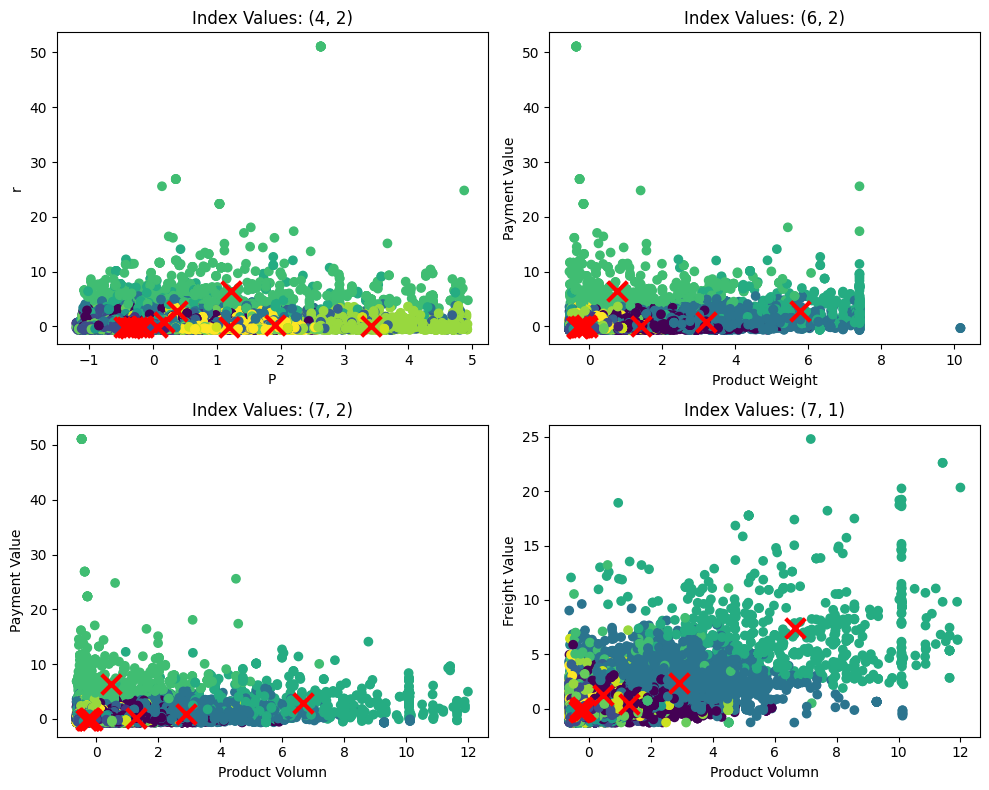

In [58]:
# Choose k = 14
# Define the index values to use for Labels and Centers
index_values = [(4, 2), (6, 2), (7, 2), (7, 1)]
xy_label_names = [("Product Description Length"), ("Product Weight", "Payment Value"), ("Product Volumn", "Payment Value"), ("Product Volumn", "Freight Value")]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=14, random_state=42, n_init=1)
labels = kmeans.fit_predict(X5)
centers = kmeans.cluster_centers_

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
for i, ax in enumerate(axs.flatten()):
    ax.scatter(X5[:,index_values[i][0]], X5[:,index_values[i][1]], c=labels)
    ax.scatter(centers[:,index_values[i][0]], centers[:,index_values[i][1]], marker='x', color='r', s=200, linewidths=3)
    ax.set_title(f"Index Values: ({index_values[i][0]}, {index_values[i][1]})")
    ax.set_xlabel(xy_label_names[i][0])
    ax.set_ylabel(xy_label_names[i][1])

# Adjust the spacing between subplots and show the plot
plt.tight_layout()
plt.show()

## 6. Time Series Sales Prediction

In [59]:
df_sales = df[['order_purchase_timestamp', 'payment_value']]
df_sales

,order_purchase_timestamp,payment_value
0,2017-10-02 10:56:33,18.12
1,2017-10-02 10:56:33,2.00
2,2017-10-02 10:56:33,18.59
3,2017-08-15 18:29:31,37.77
4,2017-08-02 18:24:47,37.77
...,...,...
113188,2017-08-12 19:20:39,213.06
113189,2017-07-31 18:10:29,55.18
113190,2017-07-31 18:10:29,100.00
113191,2017-07-11 10:45:57,47.15


In [ ]:
df_sales.loc[:, 'order_purchase_timestamp'] = pd.to_datetime(df_sales['order_purchase_timestamp'])
df_sales.loc[:, 'Year'] = df_sales['order_purchase_timestamp'].dt.year
df_sales.loc[:, 'Week'] = df_sales['order_purchase_timestamp'].dt.isocalendar().week
df_sales

In [61]:
df_weekly_sales = df_sales.copy()
df_weekly_sales = df_weekly_sales.groupby(['Year', 'Week'])['payment_value'].sum().reset_index()
df_weekly_sales

,Year,Week,payment_value
0,2016,40,57108.40
1,2016,41,4484.79
2,2016,51,19.62
3,2017,1,4497.91
4,2017,2,14600.83
...,...,...,...
85,2018,31,387585.12
86,2018,32,425818.77
87,2018,33,325424.41
88,2018,34,170035.22


In [62]:
df_weekly_sales.isna().sum()

Year             0
Week             0
payment_value    0
dtype: int64

In [63]:
df_weekly_sales[df_weekly_sales.Year == 2016]

,Year,Week,payment_value
0,2016,40,57108.40
1,2016,41,4484.79
2,2016,51,19.62


In [64]:
# Drop Year 2016
df_weekly_sales.drop(df_weekly_sales[df_weekly_sales.Year == 2016].index, inplace=True)
df_weekly_sales = df_weekly_sales.reset_index()
df_weekly_sales

,index,Year,Week,payment_value
0,3,2017,1,4497.91
1,4,2017,2,14600.83
2,5,2017,3,38359.08
3,6,2017,4,74913.89
4,7,2017,5,97610.95
...,...,...,...,...
82,85,2018,31,387585.12
83,86,2018,32,425818.77
84,87,2018,33,325424.41
85,88,2018,34,170035.22


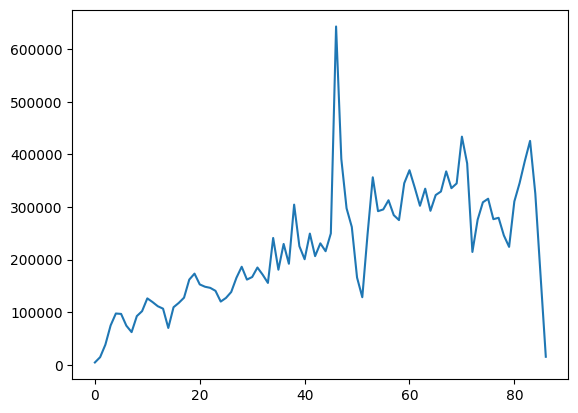

In [65]:
plt.plot(df_weekly_sales.index, df_weekly_sales. payment_value)

In [66]:
# Feature Engineering
df_weekly_sales['prev_week_sales'] = df_weekly_sales['payment_value'].shift(1)
# Add the first previous value to the month sale volumn in 2016
df_weekly_sales.loc[0, 'prev_week_sales'] = 4484.79
df_weekly_sales.drop('index', axis=1, inplace=True)
df_weekly_sales

,Year,Week,payment_value,prev_week_sales
0,2017,1,4497.91,4484.79
1,2017,2,14600.83,4497.91
2,2017,3,38359.08,14600.83
3,2017,4,74913.89,38359.08
4,2017,5,97610.95,74913.89
...,...,...,...,...
82,2018,31,387585.12,345555.24
83,2018,32,425818.77,387585.12
84,2018,33,325424.41,425818.77
85,2018,34,170035.22,325424.41


In [67]:
X6 = df_weekly_sales[['Year', 'Week', 'prev_week_sales']].values
Y6 = df_weekly_sales['payment_value'].values

# train test split
x_train6, x_test6, y_train6, y_test6 = train_test_split(X6, Y6, test_size=0.2, random_state=42)

In [68]:
# define list of models to fit and score
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge(alpha=0.1)),
    ("Lasso Regression", Lasso(alpha=0.1)),
    ("Decision Tree Regression", DecisionTreeRegressor(max_depth=5)),
    ("Random Forest Regression", RandomForestRegressor(max_depth=5))
]

scores6 = {}
# loop through the list of models, fit each model and calculate the score
for name, model in models:
    model.fit(x_train6, y_train6)
    y_pred = model.predict(x_test6)
    r2 = r2_score(y_test6, y_pred)
    mse = mean_squared_error(y_test6, y_pred)
    scores6[name] = {"R^2 Score": r2, "MSE": mse}

# create a pandas DataFrame to store the scores
df_scores = pd.DataFrame.from_dict(scores6, orient='index')
df_scores

,R^2 Score,MSE
Linear Regression,0.857080,1.854574e+09
Ridge Regression,0.856802,1.858176e+09
Lasso Regression,0.857080,1.854578e+09
Decision Tree Regression,0.674184,4.227894e+09
Random Forest Regression,0.847098,1.984101e+09


### Using LSTM by keras

In [69]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [70]:
values = df_weekly_sales.values

# split data into train and test sets
train_size = int(len(values) * 0.8)
train, test = values[:train_size, :], values[train_size:, :]

In [71]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [72]:
# split dataset into input and output variables
train_X, train_y = train_scaled[:, :-1], train_scaled[:, -1]
test_X, test_y = test_scaled[:, :-1], test_scaled[:, -1]

In [73]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [74]:
# define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [75]:
# fit the LSTM model
model.fit(train_X, train_y, epochs=70, batch_size=64, verbose=2)

# make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

Epoch 1/70
2/2 - 2s - loss: 0.1323 - 2s/epoch - 1s/step
Epoch 2/70
2/2 - 0s - loss: 0.1243 - 11ms/epoch - 5ms/step
Epoch 3/70
2/2 - 0s - loss: 0.1168 - 8ms/epoch - 4ms/step
Epoch 4/70
2/2 - 0s - loss: 0.1094 - 10ms/epoch - 5ms/step
Epoch 5/70
2/2 - 0s - loss: 0.1027 - 11ms/epoch - 5ms/step
Epoch 6/70
2/2 - 0s - loss: 0.0961 - 10ms/epoch - 5ms/step
Epoch 7/70
2/2 - 0s - loss: 0.0899 - 12ms/epoch - 6ms/step
Epoch 8/70
2/2 - 0s - loss: 0.0840 - 10ms/epoch - 5ms/step
Epoch 9/70
2/2 - 0s - loss: 0.0783 - 9ms/epoch - 5ms/step
Epoch 10/70
2/2 - 0s - loss: 0.0728 - 12ms/epoch - 6ms/step
Epoch 11/70
2/2 - 0s - loss: 0.0677 - 9ms/epoch - 4ms/step
Epoch 12/70
2/2 - 0s - loss: 0.0627 - 9ms/epoch - 5ms/step
Epoch 13/70
2/2 - 0s - loss: 0.0581 - 8ms/epoch - 4ms/step
Epoch 14/70
2/2 - 0s - loss: 0.0538 - 10ms/epoch - 5ms/step
Epoch 15/70
2/2 - 0s - loss: 0.0497 - 13ms/epoch - 6ms/step
Epoch 16/70
2/2 - 0s - loss: 0.0459 - 15ms/epoch - 7ms/step
Epoch 17/70
2/2 - 0s - loss: 0.0422 - 12ms/epoch - 6ms/st

In [76]:
# invert predictions
train_predict = scaler.inverse_transform(np.hstack((train_X.reshape(train_X.shape[0], train_X.shape[2]), train_predict)))
train_predict = train_predict[:, -1]
train_y = scaler.inverse_transform(np.hstack((train_X.reshape(train_X.shape[0], train_X.shape[2]), train_y.reshape(train_y.shape[0], 1))))
train_y = train_y[:, -1]
test_predict = scaler.inverse_transform(np.hstack((test_X.reshape(test_X.shape[0], test_X.shape[2]), test_predict)))
test_predict = test_predict[:, -1]
test_y = scaler.inverse_transform(np.hstack((test_X.reshape(test_X.shape[0], test_X.shape[2]), test_y.reshape(test_y.shape[0], 1))))
test_y = test_y[:, -1]

In [77]:
# calculate rmse
train_rmse = np.sqrt(np.mean((train_y - train_predict) ** 2))
test_rmse = np.sqrt(np.mean((test_y - test_predict) ** 2))
print('Train RMSE: %.3f' % train_rmse)
print('Test RMSE: %.3f' % test_rmse)

Train RMSE: 66135.334
Test RMSE: 64596.341


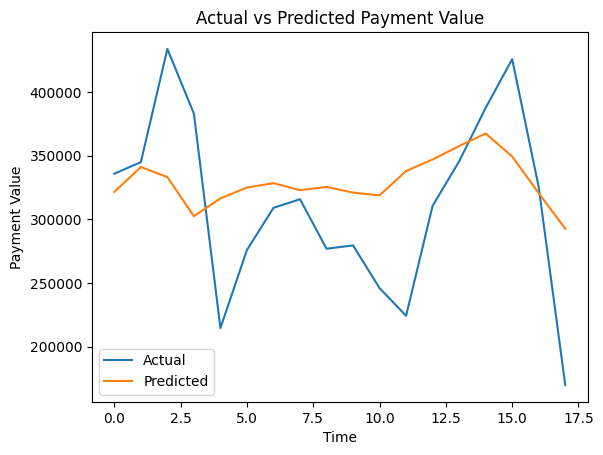

In [78]:
# Visualize the prediction results
plt.plot(test_y, label='Actual')
plt.plot(test_predict, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Payment Value')
plt.title('Actual vs Predicted Payment Value')
plt.legend()
plt.show()